In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
output_notebook()

Loading BokehJS ...

In [3]:
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\creditcard.csv")

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [13]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
df.duplicated().sum()

1081

In [17]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [19]:
df = df.drop_duplicates()
print("New shape after dropping duplicates:", df.shape)

New shape after dropping duplicates: (283726, 31)


# EXPLORATORY DATA ANALYSIS

## 1. What is the proportion of fraud vs. non-fraud transactions?

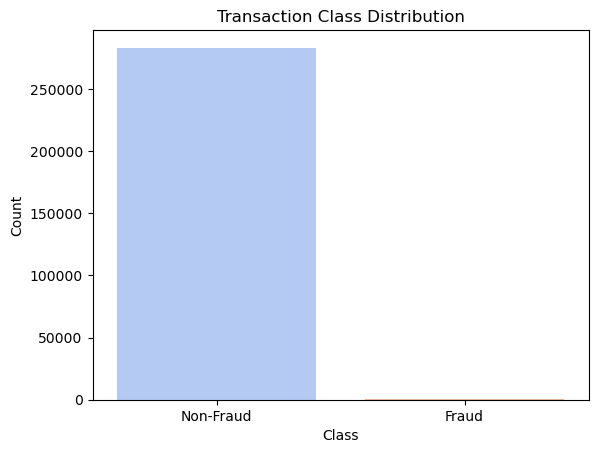

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Class', palette='coolwarm')
plt.title('Transaction Class Distribution')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.ylabel('Count')
plt.show()

Business Objective: Understand class imbalance to assess fraud rate and modeling complexity.
Interpretation:
- Fraud cases are extremely rare (~0.17%). 
- Business implication: fraud detection is a rare-event problem, requiring specialized models

## 2. How do transaction amounts differ between fraud and non-fraud cases?

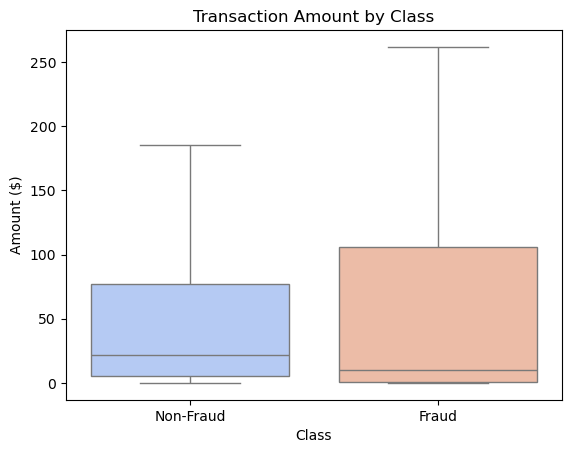

In [31]:
sns.boxplot(data=df, x='Class', y='Amount', showfliers=False, palette='coolwarm')
plt.title('Transaction Amount by Class')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.ylabel('Amount ($)')
plt.show()

Business Objective: Identify if fraud is associated with large or small amounts.
Interpretation:
- Fraud transactions often have higher variance and some very high amounts.
- Business implication: flagging high-value transactions may help reduce risk.

## 3. When does fraud typically occur during the day?

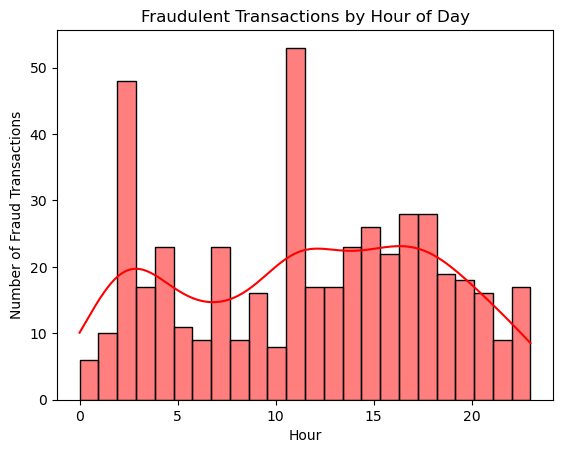

In [37]:
import numpy as np

df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600) % 24)
sns.histplot(data=df[df['Class']==1], x='Hour', bins=24, kde=True, color='red')
plt.title('Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Fraud Transactions')
plt.show()

Business Objective: Identify peak fraud hours for fraud monitoring systems.
Interpretation:
Peaks around specific hours (e.g., 1 AM–5 AM) suggest fraud occurs during less monitored hours.
Business implication: Improve real-time detection during off-hours.

##  4. What’s the correlation between features and fraud?

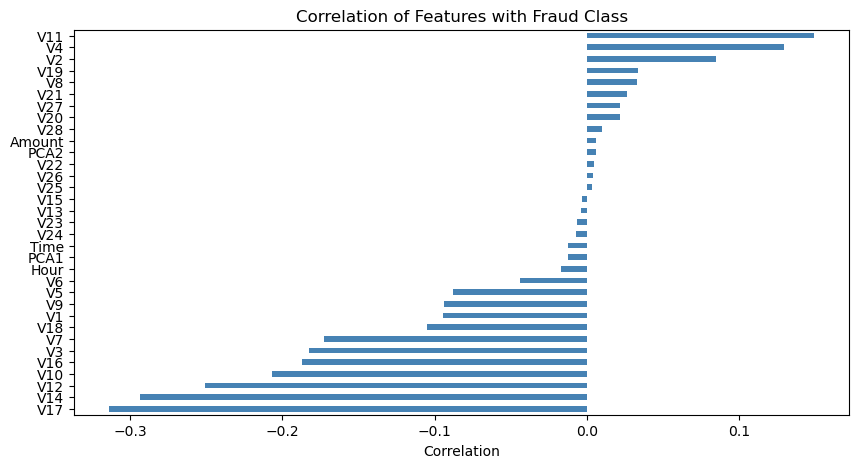

In [60]:
corr = df.corr()['Class'].drop('Class').sort_values()
plt.figure(figsize=(10,5))
corr.plot(kind='barh', color='steelblue')
plt.title('Correlation of Features with Fraud Class')
plt.xlabel('Correlation')
plt.show()

Business Objective: Understand which features are useful for prediction.

Interpretation:
Features like V14, V10, and V12 have strong negative correlation with fraud.
Business implication: Focus on these for modeling or explainable AI.

## 5. What are the top 10 highest fraud transactions by amount?

In [66]:
top_frauds = df[df['Class'] == 1].sort_values(by='Amount', ascending=False).head(10)
print(top_frauds[['Time', 'Amount']])

            Time   Amount
176049  122608.0  2125.87
6971      9064.0  1809.68
249167  154278.0  1504.93
89190    62467.0  1402.16
81609    59011.0  1389.56
95597    65385.0  1354.25
199896  133184.0  1335.00
10690    18088.0  1218.89
249239  154309.0  1096.99
233258  147501.0   996.27


## 6. Is there a trend in fraud over time (line plot)?

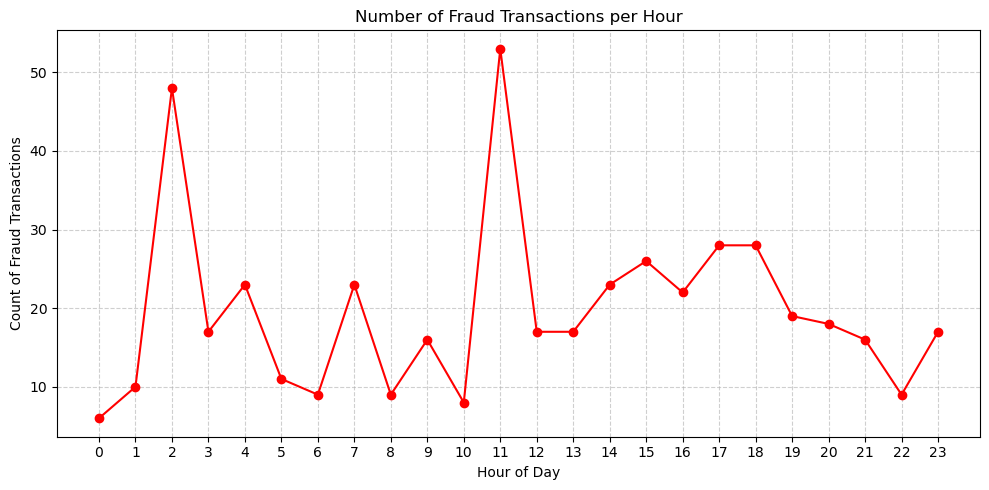

In [72]:
import matplotlib.pyplot as plt

# Create a new column for Hour
df['Hour'] = (df['Time'] // 3600) % 24

# Count frauds by hour
fraud_counts = df[df['Class'] == 1].groupby('Hour').size()

# Fill missing hours with 0
fraud_counts = fraud_counts.reindex(range(24), fill_value=0)

# Plot
plt.figure(figsize=(10,5))
plt.plot(fraud_counts.index, fraud_counts.values, marker='o', color='red', linestyle='-')
plt.xticks(range(24))  # Show all 24 hours
plt.title("Number of Fraud Transactions per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count of Fraud Transactions")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Business Objective:
Identify time windows with heightened fraud activity to improve detection and response mechanisms.

Interpretation:
Fraudulent transactions are more likely to occur during late-night and early-morning hours when monitoring is minimal. Midday hours show lower fraud activity, possibly due to increased vigilance during business operations.

## 7.  Does the amount of fraudulent transactions differ significantly from non-fraudulent ones?

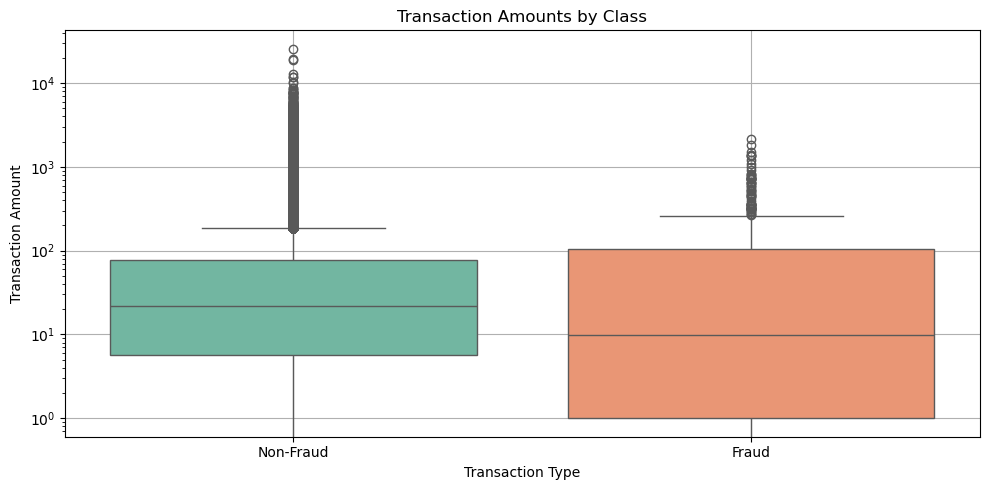

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(x='Class', y='Amount', data=df, palette='Set2')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.title('Transaction Amounts by Class')
plt.ylabel('Transaction Amount')
plt.xlabel('Transaction Type')
plt.yscale('log')  # Log scale for better visibility
plt.grid(True)
plt.tight_layout()
plt.show()

Business Objective:
Understand transaction amount patterns to differentiate between fraudulent and legitimate behavior.

Interpretation:
If fraudulent transactions are predominantly of low value, it may suggest an attempt to stay under the radar of automated security systems. Conversely, frequent high-value fraudulent transactions indicate aggressive, targeted attacks requiring stricter controls.

## 8. What is the fraud rate distribution across different transaction amounts?

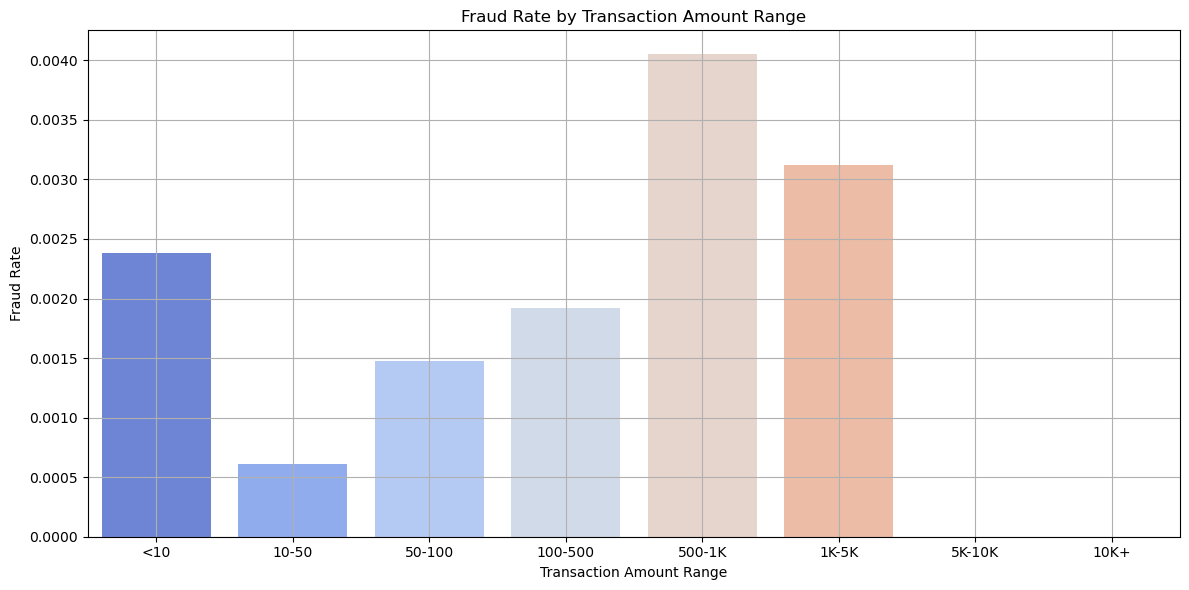

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bin the Amount into ranges
df['Amount_Bin'] = pd.cut(df['Amount'], bins=[-1, 10, 50, 100, 500, 1000, 5000, 10000, df['Amount'].max()],
                          labels=['<10', '10-50', '50-100', '100-500', '500-1K', '1K-5K', '5K-10K', '10K+'])

# Calculate fraud rate per bin
fraud_rate = df.groupby('Amount_Bin')['Class'].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Amount_Bin', y='Class', data=fraud_rate, palette='coolwarm')
plt.title('Fraud Rate by Transaction Amount Range')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Fraud Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

Business Objective:
Assess how fraud rates differ across low, medium, and high transaction amounts to identify which value ranges are more susceptible to fraudulent activity.

Interpretation:
Fraud rates may vary significantly across transaction bands. A high fraud rate in large-value transactions suggests the need for stricter verification for high-ticket items. Conversely, elevated fraud in low-value ranges may signal automated or bot-driven fraud attempts.